# Predicción de Mercados usando Tensorflow

### Import de librerías

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

### Import de los datos

In [75]:
data = pd.read_csv('./AAPL_5yr.csv')
print(data.shape)
print(data.sample(7))

data['Date'] = pd.to_datetime(data['Date'])

(1258, 7)
            Date        Open        High         Low       Close   Adj Close  \
237   2019-03-07   43.467499   43.610001   43.005001   43.125000   41.737995   
438   2019-12-20   70.557503   70.662498   69.639999   69.860001   68.335945   
796   2021-05-25  127.820000  128.320007  126.320000  126.900002  125.603638   
1041  2022-05-13  144.589996  148.100006  143.110001  147.110001  146.439056   
951   2022-01-04  182.630005  182.940002  179.119995  179.699997  178.390686   
994   2022-03-08  158.820007  162.880005  155.800003  157.440002  156.492020   
324   2019-07-11   50.827499   51.097500   50.427502   50.437500   49.003288   

         Volume  
237    99185600  
438   275978000  
796    72009500  
1041  113990900  
951    99310400  
994   131148300  
324    80767200  


### Mostramos las velas diarias

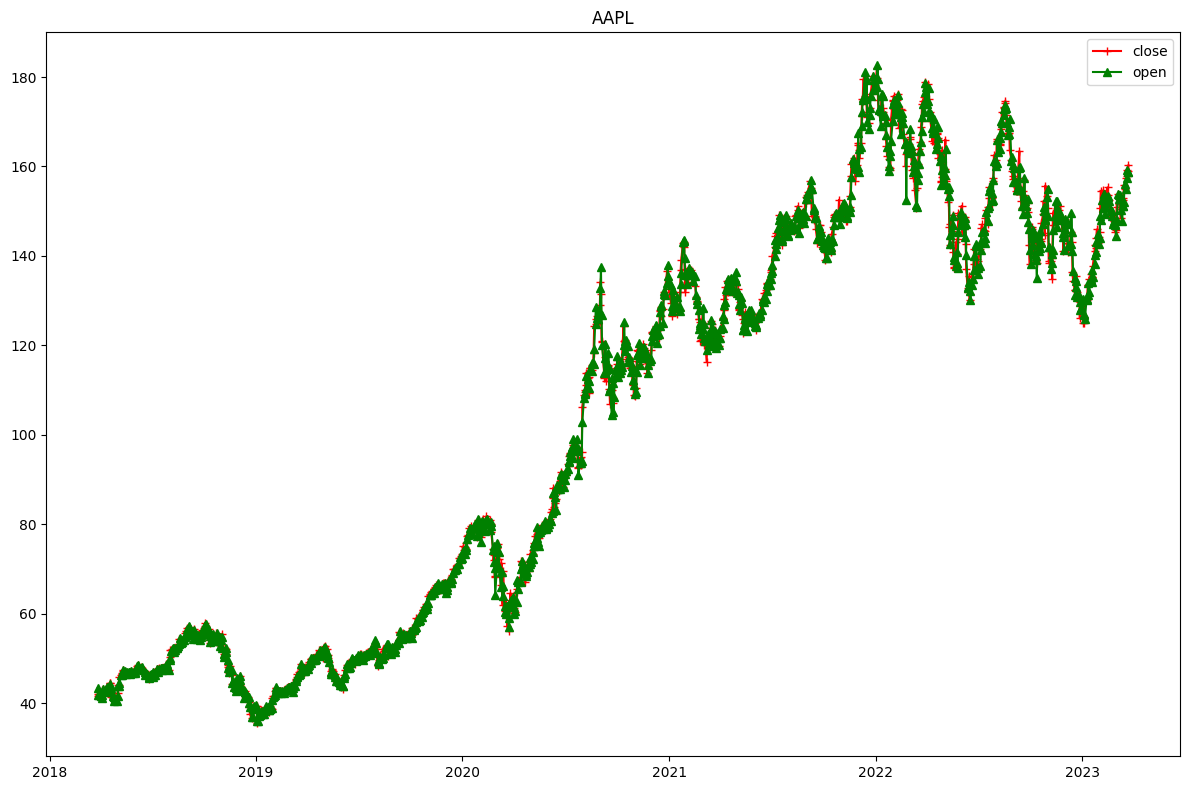

In [76]:
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Close'], c="r", label="close", marker="+")
plt.plot(data['Date'], data['Open'], c="g", label="open", marker="^")
plt.title("AAPL")
plt.legend()
plt.tight_layout()

### Mostramos el volumen diario

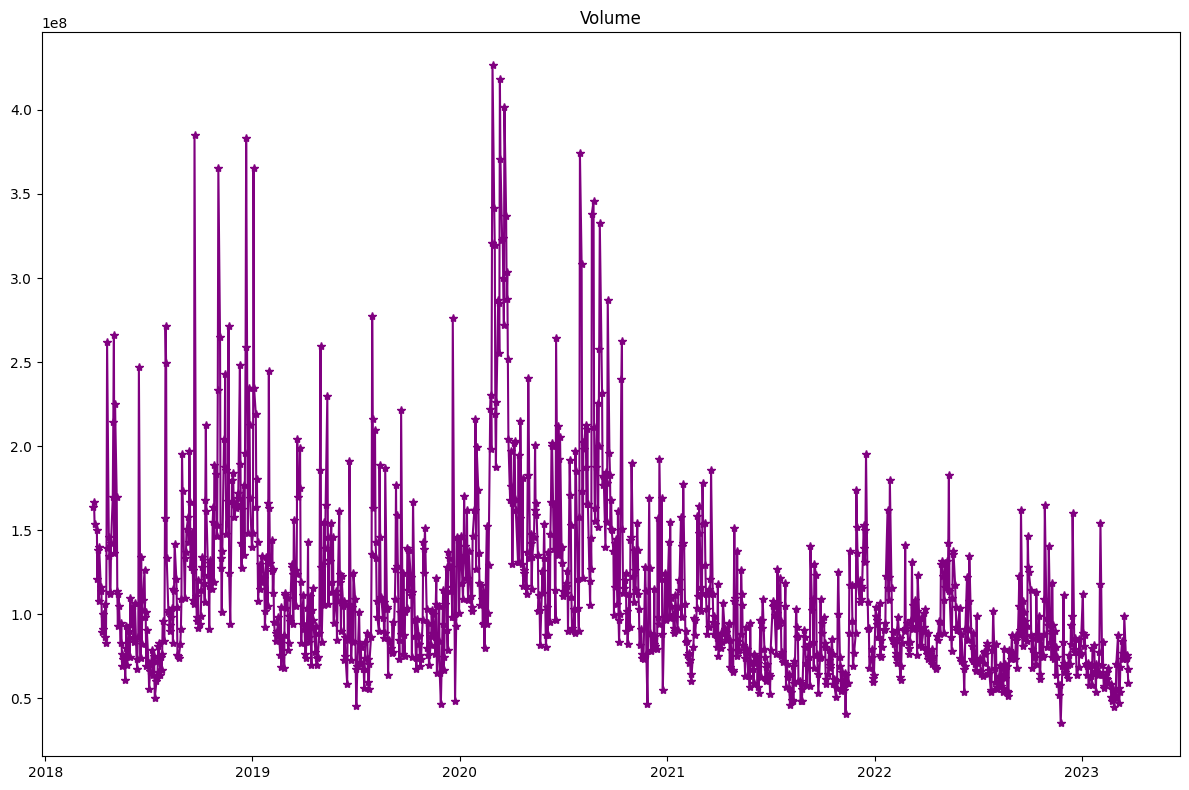

In [77]:
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Volume'], c='purple', marker='*')
plt.title("Volume")
plt.tight_layout()

### Mostramos los datos de entreno

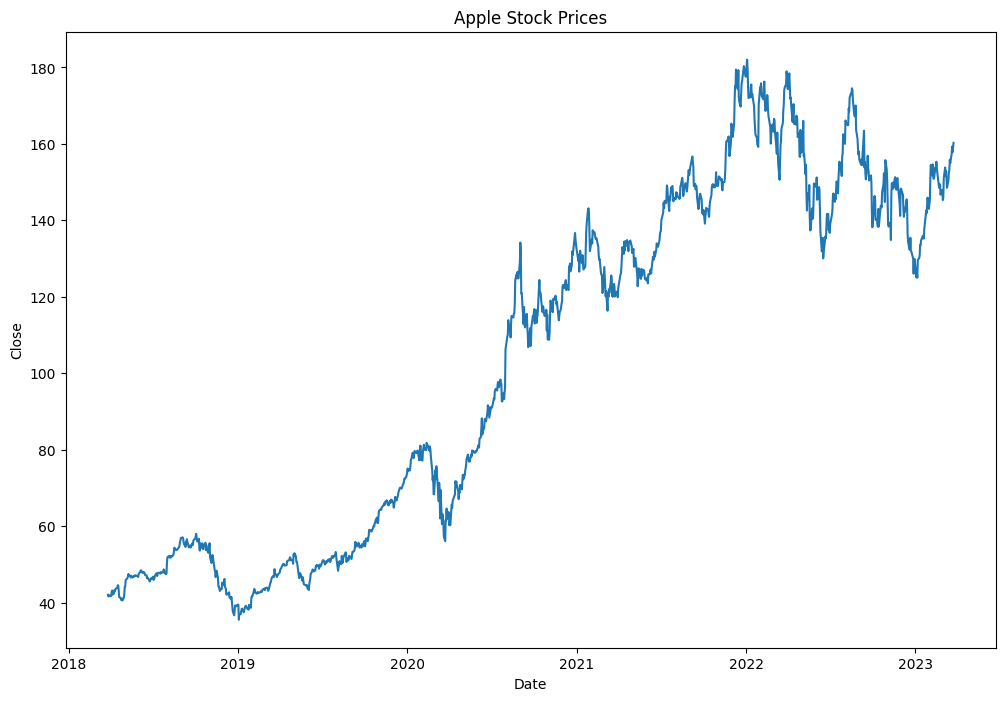

In [78]:
prediction_range = data.loc[(data['Date'] > datetime(2018,3,27)) & (data['Date'] < datetime(2023,3,27))]
plt.figure(figsize=(12, 8))
plt.plot(data['Date'], data['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

### Establecemos el set de entrenamiento y otro para la validación (95%/5%)

In [96]:
close_data = data.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
test = int(np.floor(len(dataset) * .05))
print(training)
print(test)

1196
62


### Preparamos los datos para el entrenamiento

In [90]:
from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
  
train_data = scaled_data[0:int(training), :]

x_train = []
y_train = []
  
for i in range(test, len(train_data)):
    x_train.append(train_data[i - test:i, 0])
    y_train.append(train_data[i, 0])
  
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.04463599, 0.04146111, 0.04368012, 0.04180249, 0.04472134,
       0.05021763, 0.05224887, 0.04470428, 0.04755484, 0.05301698,
       0.05163438, 0.05453614, 0.05554322, 0.05740378, 0.06153453,
       0.06085174, 0.05224887, 0.04016386, 0.03934454, 0.03541862,
       0.03663052, 0.03760348, 0.03436034, 0.03937867, 0.04593327,
       0.05868397, 0.05923017, 0.07107621, 0.07334642, 0.07486558,
       0.07710164, 0.08167618, 0.07920115, 0.0784501 , 0.07553128,
       0.07850131, 0.07647009, 0.07530937, 0.07756252, 0.07676027,
       0.07880857, 0.0784501 , 0.07918409, 0.07802337, 0.07734061,
       0.07626525, 0.08201758, 0.08473158, 0.08725782, 0.08840146,
       0.08751388, 0.08450968, 0.08370742, 0.0854997 , 0.08280275,
       0.08297346, 0.07962788, 0.0794572 , 0.07425109, 0.07563369])]


### Preparamos el modelo

In [88]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

2023-04-09 23:37:44.853181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 23:37:44.855272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 23:37:44.856345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1923ab39a0>>

### Procedemos a entrenar el modelo

In [82]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10


2023-04-09 23:31:20.220494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 23:31:20.222171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 23:31:20.223614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

36/36 [==============================] - 4s 57ms/step - loss: 0.0401
Epoch 2/10
36/36 [==============================] - 2s 56ms/step - loss: 0.0159
Epoch 3/10
36/36 [==============================] - 2s 54ms/step - loss: 0.0147
Epoch 4/10
36/36 [==============================] - 2s 58ms/step - loss: 0.0136
Epoch 5/10
36/36 [==============================] - 2s 58ms/step - loss: 0.0111
Epoch 6/10
36/36 [==============================] - 2s 54ms/step - loss: 0.0106
Epoch 7/10
36/36 [==============================] - 2s 56ms/step - loss: 0.0095
Epoch 8/10
36/36 [==============================] - 2s 56ms/step - loss: 0.0101
Epoch 9/10
36/36 [==============================] - 2s 55ms/step - loss: 0.0090
Epoch 10/10
36/36 [==============================] - 2s 57ms/step - loss: 0.0092


In [83]:
test_data = scaled_data[training - test:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-test:i, 0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  
# prediccion de los datos de prueba
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
  
# metricas
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2023-04-09 23:31:42.545516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-09 23:31:42.546731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-09 23:31:42.548249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 0s 20ms/step
MSE 84.26911411782426
RMSE 9.17982102863799


### Mostramos el resultado final con la predicción, entrenamiento y pruebas

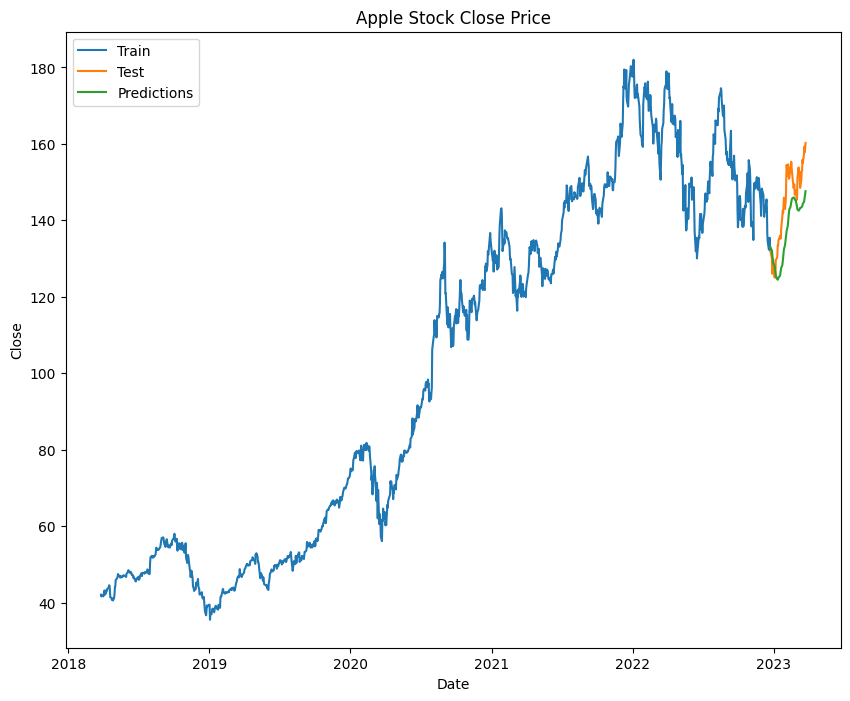

In [84]:
train = data[:training]
test = data[training:]
test['Predictions'] = predictions
  
plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
# plt.axis([2022,2023,120,180])